### 1) Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
# Seaborn tend to have different warnings
import warnings
warnings.filterwarnings("ignore")  

import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px

# Code to get multiple outputs from a single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# CHECK-POINT-1
### 2) Importing Companies and rounds2 files

In [2]:
companies = pd.read_csv("companies.csv",encoding = "palmos")
rounds2 = pd.read_csv("rounds2.csv",encoding = "palmos")

### 3) Converting the company links to upper case

In [3]:
rounds2['company_permalink'] = rounds2['company_permalink'].str.upper()
rounds2['company_permalink'].describe()

count                       114949
unique                       66368
top       /ORGANIZATION/SOLARFLARE
freq                            19
Name: company_permalink, dtype: object

In [4]:
companies['permalink'] = companies['permalink'].str.upper()
companies['permalink'].describe()

count                                           66368
unique                                          66368
top       /ORGANIZATION/JIUBANG-DIGITAL-TECHNOLOGY-CO
freq                                                1
Name: permalink, dtype: object

### 4) Checking whether all companie(s) are present in 2 files

In [5]:
# Comparing rounds2 with companies
companies['permalink'].isin(rounds2['company_permalink']).value_counts()

True    66368
Name: permalink, dtype: int64

In [6]:
# Comparing companies with rounds2
rounds2['company_permalink'].isin(companies['permalink']).value_counts()

True    114949
Name: company_permalink, dtype: int64

### 5) Merging the 2 data frames to 'master_frame'

In [7]:
# Renaming column name 'company_permalink' to 'permalink' in rounds2
rounds2.rename(columns = {'company_permalink':'permalink'}, inplace = True)

# Merging companies and rounds2
master_frame = pd.merge(companies,rounds2, how = 'outer', on = 'permalink')
master_frame.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                114949 non-null  object 
 1   name                     114948 non-null  object 
 2   homepage_url             108815 non-null  object 
 3   category_list            111539 non-null  object 
 4   status                   114949 non-null  object 
 5   country_code             106271 non-null  object 
 6   state_code               104003 non-null  object 
 7   region                   104782 non-null  object 
 8   city                     104785 non-null  object 
 9   founded_at               94428 non-null   object 
 10  funding_round_permalink  114949 non-null  object 
 11  funding_round_type       114949 non-null  object 
 12  funding_round_code       31140 non-null   object 
 13  funded_at                114949 non-null  object 
 14  rais

In [8]:
#no. of observartions = 15

# CHECK-POINT-2

In [9]:
# Knowing the funding types
master_frame.groupby(['funding_round_type']).describe()

raised_amount_usd                                       \
                                  count          mean           std      min   
funding_round_type                                                             
angel                            4860.0  9.586945e+05  7.404397e+06      0.0   
convertible_note                 1447.0  1.453439e+06  8.043846e+06      0.0   
debt_financing                   6682.0  1.704353e+07  2.803204e+08      0.0   
equity_crowdfunding              1228.0  5.383682e+05  1.719329e+06      0.0   
grant                            2124.0  4.300576e+06  2.558742e+07      0.0   
non_equity_assistance              73.0  4.112031e+05  1.771747e+06      0.0   
post_ipo_debt                     152.0  1.687046e+08  6.024738e+08  70000.0   
post_ipo_equity                   628.0  8.218249e+07  4.691889e+08     77.0   
private_equity                   1936.0  7.330859e+07  1.981135e+08      0.0   
product_crowdfunding              386.0  1.363131e+06  4.698380e+06      0.0   
secondary_market                   30.0  7.964963e+07  1.401038e+08   2323.0   
seed                            23603.0  7.198180e+05  2.221733e+06      0.0   
undisclosed                      1582.0  1.924237e+07  1.993238e+08      0.0   
venture                         50228.0  1.174895e+07  8.635207e+07      0.0   

                                                                         
                              25%         50%         75%           max  
funding_round_type                                                       
angel                   150000.00    400000.0   1000000.0  4.945120e+08  
convertible_note         78847.50    272000.0   1000000.0  1.850483e+08  
debt_financing          330484.25   1100000.0   4000000.0  2.127194e+10  
equity_crowdfunding       7000.00    100000.0    395901.0  2.740000e+07  
grant                    50000.00    201684.0   1700000.0  7.500000e+08  
non_equity_assistance    25000.00     60000.0    125000.0  1.500000e+07  
post_ipo_debt          4000000.00  19950000.0  60000000.0  5.800000e+09  
post_ipo_equity        3764794.00  12262852.5  40000000.0  1.066494e+10  
private_equity         5000000.00  20000000.0  75000000.0  4.745460e+09  
product_crowdfunding     40241.75    183915.0    735000.0  5.200000e+07  
secondary_market       5025000.00  32600000.0  84475000.0  6.806116e+08  
seed                     55000.00    275000.0   1000000.0  2.000000e+08  
undisclosed             220000.00   1018680.0   4848804.0  5.000000e+09  
venture                1600901.75   5000000.0  12000000.0  1.760000e+10

### 6) Filtering the columns with "angel","venture","seed" and "private_equity"

In [10]:
mf_g4 = master_frame[master_frame['funding_round_type'].isin(["angel","venture","seed","private_equity"])]

In [11]:
mf_g4.groupby(['funding_round_type']).describe()

raised_amount_usd                                   \
                               count          mean           std  min   
funding_round_type                                                      
angel                         4860.0  9.586945e+05  7.404397e+06  0.0   
private_equity                1936.0  7.330859e+07  1.981135e+08  0.0   
seed                         23603.0  7.198180e+05  2.221733e+06  0.0   
venture                      50228.0  1.174895e+07  8.635207e+07  0.0   

                                                                      
                           25%         50%         75%           max  
funding_round_type                                                    
angel                150000.00    400000.0   1000000.0  4.945120e+08  
private_equity      5000000.00  20000000.0  75000000.0  4.745460e+09  
seed                  55000.00    275000.0   1000000.0  2.000000e+08  
venture             1600901.75   5000000.0  12000000.0  1.760000e+10

### 7) Removing the missing values from 'master_frame' for 'raised_amount_usd'

In [12]:
mf_g4 = mf_g4[~(mf_g4['raised_amount_usd'].isna())]
mf_g4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80627 entries, 0 to 114947
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                80627 non-null  object 
 1   name                     80626 non-null  object 
 2   homepage_url             77182 non-null  object 
 3   category_list            79772 non-null  object 
 4   status                   80627 non-null  object 
 5   country_code             75606 non-null  object 
 6   state_code               74055 non-null  object 
 7   region                   74564 non-null  object 
 8   city                     74567 non-null  object 
 9   founded_at               67181 non-null  object 
 10  funding_round_permalink  80627 non-null  object 
 11  funding_round_type       80627 non-null  object 
 12  funding_round_code       28153 non-null  object 
 13  funded_at                80627 non-null  object 
 14  raised_amount_usd    

## Investment type analysis

### 8) Analyzing data before removing outliers

In [13]:
# Filtering mf_g4 with 'venture' and 'raised_amount_usd' greater than 0.
mf_g4[(mf_g4["funding_round_type"] == "venture") & (mf_g4["raised_amount_usd"]>0 )]["raised_amount_usd"].describe()

count    5.019900e+04
mean     1.175574e+07
std      8.637654e+07
min      1.000000e+00
25%      1.610000e+06
50%      5.000000e+06
75%      1.200000e+07
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

In [14]:
# Filtering mf_g4 with 'angel' and 'raised_amount_usd' greater than 0.
mf_g4[(mf_g4["funding_round_type"] == "angel") & (mf_g4["raised_amount_usd"]>0 )]["raised_amount_usd"].describe()

count    4.829000e+03
mean     9.648489e+05
std      7.427731e+06
min      1.200000e+01
25%      1.500000e+05
50%      4.000000e+05
75%      1.000000e+06
max      4.945120e+08
Name: raised_amount_usd, dtype: float64

In [15]:
# Filtering mf_g4 with 'seed' and 'raised_amount_usd' greater than 0.
mf_g4[(mf_g4["funding_round_type"] == "seed") & (mf_g4["raised_amount_usd"]>0 )]["raised_amount_usd"].describe()

count    2.350800e+04
mean     7.227269e+05
std      2.225745e+06
min      1.000000e+00
25%      5.911075e+04
50%      2.800000e+05
75%      1.000000e+06
max      2.000000e+08
Name: raised_amount_usd, dtype: float64

In [16]:
# Filtering mf_g4 with 'private_equity' and 'raised_amount_usd' greater than 0.
mf_g4[(mf_g4["funding_round_type"] == "private_equity") & (mf_g4["raised_amount_usd"]>0 )]["raised_amount_usd"].describe()

count    1.933000e+03
mean     7.342237e+07
std      1.982461e+08
min      6.000000e+00
25%      5.000000e+06
50%      2.000000e+07
75%      7.500000e+07
max      4.745460e+09
Name: raised_amount_usd, dtype: float64

### 9) Deciding the representative funding amount after removing outliers

#### 9.1) Deciding the representative funding amount for "venture"

50228

50199

<AxesSubplot:>

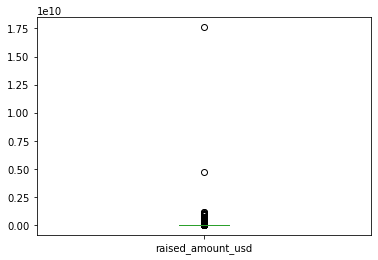

In [17]:
# Getting number of investors in 'venture' type
mf_g4[mf_g4["funding_round_type"] == "venture"]["raised_amount_usd"].value_counts().sum()

# Getting number of investors in 'venture' type with 'raised_amount_usd' greater than 0.
mf_g4[(mf_g4["funding_round_type"] == "venture") & (mf_g4["raised_amount_usd"]>0 )]["raised_amount_usd"].value_counts().sum()

# Boxplot to know sense of data
mf_g4[mf_g4["funding_round_type"] == "venture"]["raised_amount_usd"].plot.box()

# Getting dataframe with 'venture' type and 'raised_amount_usd' greater than 0.
Mv=mf_g4[(mf_g4["funding_round_type"] == "venture") & (mf_g4["raised_amount_usd"]>0 )]

In [18]:
q1=Mv["raised_amount_usd"].quantile(0.25)
q2=Mv["raised_amount_usd"].quantile(0.75)
IQR= q2-q1
l = q1-1.5*IQR
u = q2+1.5*IQR
print(l,u)

-13975000.0 27585000.0


4324

30000000.0    556
50000000.0    317
40000000.0    292
35000000.0    231
60000000.0    129
             ... 
42200000.0      1
45345600.0      1
45869000.0      1
29360000.0      1
38800000.0      1
Name: raised_amount_usd, Length: 886, dtype: int64

0

Series([], Name: raised_amount_usd, dtype: int64)

10000000.0    1809
5000000.0     1713
3000000.0     1215
2000000.0     1210
1000000.0     1138
              ... 
892990.0         1
8192480.0        1
190476.0         1
1024044.0        1
5.0              1
Name: raised_amount_usd, Length: 11662, dtype: int64

count    4.587500e+04
mean     6.434684e+06
std      6.383854e+06
min      1.000000e+00
25%      1.500000e+06
50%      4.223475e+06
75%      1.000000e+07
max      2.757661e+07
Name: raised_amount_usd, dtype: float64

<AxesSubplot:>

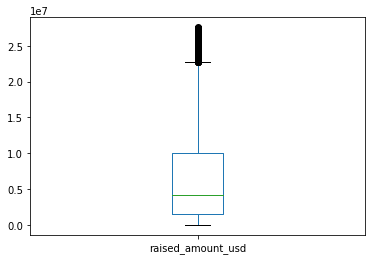

<AxesSubplot:ylabel='Frequency'>

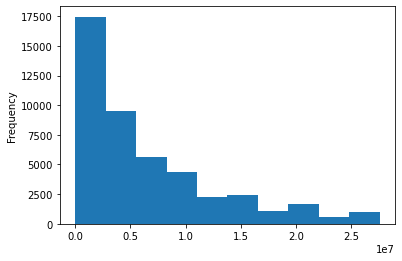

<AxesSubplot:xlabel='raised_amount_usd', ylabel='Density'>

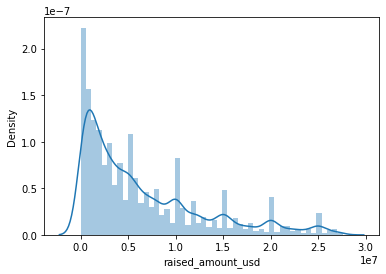

In [19]:
# Getting number of investors in 'venture' type with 'raised_amount_usd' less than lower extreme.
Mv[Mv["raised_amount_usd"]>=u]["raised_amount_usd"].value_counts().sum()
Mv[Mv["raised_amount_usd"]>=u]["raised_amount_usd"].value_counts()

# Getting number of investors in 'venture' type with 'raised_amount_usd' greater than upper extreme.
Mv[(Mv["raised_amount_usd"]<=l)]["raised_amount_usd"].value_counts().sum()
Mv[(Mv["raised_amount_usd"]<=l)]["raised_amount_usd"].value_counts()

# Getting some information of data in 'venture' type after removing outliers
Mvo = Mv[(Mv["raised_amount_usd"]>=l) & (Mv["raised_amount_usd"]<=u)]
Mv[(Mv["raised_amount_usd"]>=l) & (Mv["raised_amount_usd"]<=u)]["raised_amount_usd"].value_counts()
Mv[(Mv["raised_amount_usd"]>=l) & (Mv["raised_amount_usd"]<=u)]["raised_amount_usd"].describe()


# To visualize the scenario by plotting
Mv[(Mv["raised_amount_usd"]>=l) & (Mv["raised_amount_usd"]<=u)]["raised_amount_usd"].plot.box()
plt.show()

Mv[(Mv["raised_amount_usd"]>=l) & (Mv["raised_amount_usd"]<=u)]["raised_amount_usd"].plot.hist()
plt.show()

sns.distplot(Mv[(Mv["raised_amount_usd"]>=l) & (Mv["raised_amount_usd"]<=u)]["raised_amount_usd"])
plt.show()

Considering representative funding amount for "venture" as 6.434684e+06 (mean from the above output)

#### 9.2) Deciding the representative funding amount for "angel"

4860

4829

<AxesSubplot:>

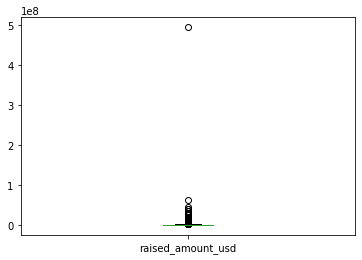

In [20]:
mf_g4[mf_g4["funding_round_type"] == "angel"]["raised_amount_usd"].value_counts().sum()

mf_g4[(mf_g4["funding_round_type"] == "angel") & (mf_g4["raised_amount_usd"]>0 )]["raised_amount_usd"].value_counts().sum()

mf_g4[mf_g4["funding_round_type"] == "angel"]["raised_amount_usd"].plot.box()

Ma=mf_g4[(mf_g4["funding_round_type"] == "angel") & (mf_g4["raised_amount_usd"]>0 )]

In [21]:
q1=Ma["raised_amount_usd"].quantile(0.25)
q2=Ma["raised_amount_usd"].quantile(0.75)
IQR= q2-q1
l = q1-1.5*IQR
u = q2+1.5*IQR
print(l,u)

-1125000.0 2275000.0


318

3000000.0     47
2500000.0     35
5000000.0     18
4000000.0     16
3500000.0     15
              ..
34000000.0     1
3026134.0      1
63590263.0     1
2411840.0      1
12804097.0     1
Name: raised_amount_usd, Length: 123, dtype: int64

0

Series([], Name: raised_amount_usd, dtype: int64)

500000.0     276
1000000.0    268
100000.0     246
250000.0     174
300000.0     153
            ... 
129690.0       1
1239465.0      1
99995.0        1
537817.0       1
268305.0       1
Name: raised_amount_usd, Length: 1358, dtype: int64

count    4.511000e+03
mean     5.369964e+05
std      5.149583e+05
min      1.200000e+01
25%      1.500000e+05
50%      3.522030e+05
75%      7.730915e+05
max      2.265394e+06
Name: raised_amount_usd, dtype: float64

<AxesSubplot:>

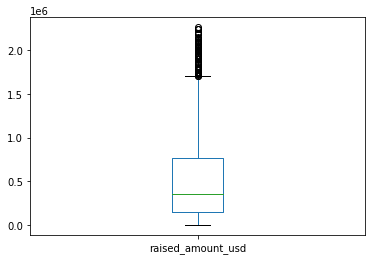

<AxesSubplot:ylabel='Frequency'>

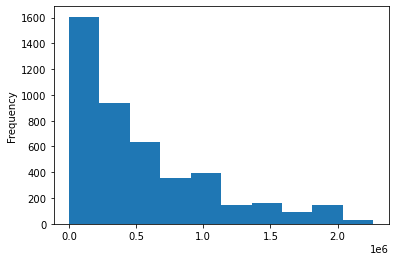

<AxesSubplot:xlabel='raised_amount_usd', ylabel='Density'>

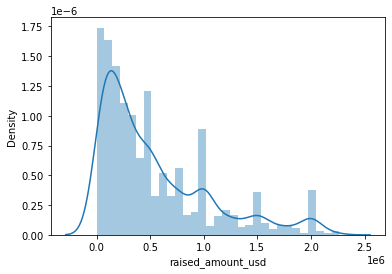

In [22]:
Ma[Ma["raised_amount_usd"]>=u]["raised_amount_usd"].value_counts().sum()
Ma[Ma["raised_amount_usd"]>=u]["raised_amount_usd"].value_counts()

Ma[(Ma["raised_amount_usd"]<=l)]["raised_amount_usd"].value_counts().sum()
Ma[(Ma["raised_amount_usd"]<=l)]["raised_amount_usd"].value_counts()

Mao = Ma[(Ma["raised_amount_usd"]>=l) & (Ma["raised_amount_usd"]<=u)]
Ma[(Ma["raised_amount_usd"]>=l) & (Ma["raised_amount_usd"]<=u)]["raised_amount_usd"].value_counts()
Ma[(Ma["raised_amount_usd"]>=l) & (Ma["raised_amount_usd"]<=u)]["raised_amount_usd"].describe()


# To visualize the scenario
Ma[(Ma["raised_amount_usd"]>=l) & (Ma["raised_amount_usd"]<=u)]["raised_amount_usd"].plot.box()
plt.show()

Ma[(Ma["raised_amount_usd"]>=l) & (Ma["raised_amount_usd"]<=u)]["raised_amount_usd"].plot.hist()
plt.show()

sns.distplot(Ma[(Ma["raised_amount_usd"]>=l) & (Ma["raised_amount_usd"]<=u)]["raised_amount_usd"])
plt.show()

Considering representative funding amount for "angel" as 5.369964e+05 (mean from the above output)

#### 9.3) Deciding the representative funding amount for "seed"

23603

23508

<AxesSubplot:>

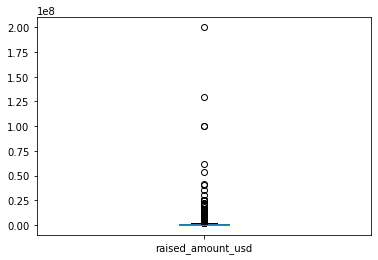

In [23]:
mf_g4[mf_g4["funding_round_type"] == "seed"]["raised_amount_usd"].value_counts().sum()
mf_g4[(mf_g4["funding_round_type"] == "seed") & (mf_g4["raised_amount_usd"]>0 )]["raised_amount_usd"].value_counts().sum()
mf_g4[mf_g4["funding_round_type"] == "seed"]["raised_amount_usd"].plot.box()

Ms=mf_g4[(mf_g4["funding_round_type"] == "seed") & (mf_g4["raised_amount_usd"]>0 )]

In [24]:
q1=Ms["raised_amount_usd"].quantile(0.25)
q2=Ms["raised_amount_usd"].quantile(0.75)
IQR= q2-q1
l = q1-1.5*IQR
u = q2+1.5*IQR
print(l,u)

-1352223.125 2411333.875


1321

2500000.0    202
3000000.0    189
4000000.0     67
5000000.0     55
3500000.0     50
            ... 
2512003.0      1
5335323.0      1
6900000.0      1
3224766.0      1
2793488.0      1
Name: raised_amount_usd, Length: 370, dtype: int64

0

Series([], Name: raised_amount_usd, dtype: int64)

1000000.0    1065
100000.0      963
500000.0      960
40000.0       837
50000.0       823
             ... 
152686.0        1
1680239.0       1
55860.0         1
676246.0        1
401304.0        1
Name: raised_amount_usd, Length: 4602, dtype: int64

count    2.218700e+04
mean     5.026031e+05
std      5.794619e+05
min      1.000000e+00
25%      5.000000e+04
50%      2.500000e+05
75%      7.902620e+05
max      2.410000e+06
Name: raised_amount_usd, dtype: float64

<AxesSubplot:>

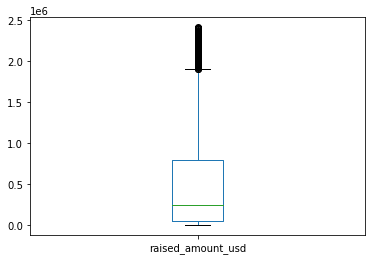

<AxesSubplot:ylabel='Frequency'>

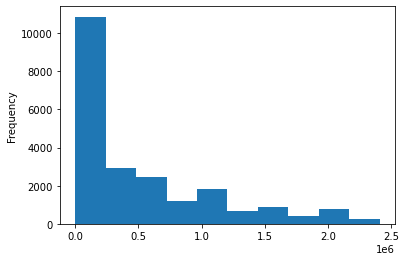

<AxesSubplot:xlabel='raised_amount_usd', ylabel='Density'>

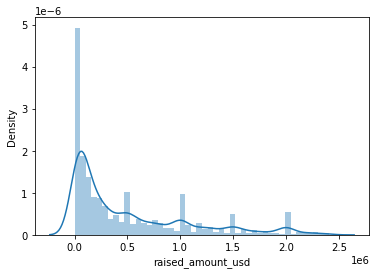

In [25]:
Ms[Ms["raised_amount_usd"]>=u]["raised_amount_usd"].value_counts().sum()
Ms[Ms["raised_amount_usd"]>=u]["raised_amount_usd"].value_counts()

Ms[(Ms["raised_amount_usd"]<=l)]["raised_amount_usd"].value_counts().sum()
Ms[(Ms["raised_amount_usd"]<=l)]["raised_amount_usd"].value_counts()

Mso=Ms[(Ms["raised_amount_usd"]>=l) & (Ms["raised_amount_usd"]<=u)]
Ms[(Ms["raised_amount_usd"]>=l) & (Ms["raised_amount_usd"]<=u)]["raised_amount_usd"].value_counts()
Ms[(Ms["raised_amount_usd"]>=l) & (Ms["raised_amount_usd"]<=u)]["raised_amount_usd"].describe()


# To visualize the scenario
Ms[(Ms["raised_amount_usd"]>=l) & (Ms["raised_amount_usd"]<=u)]["raised_amount_usd"].plot.box()
plt.show()

Ms[(Ms["raised_amount_usd"]>=l) & (Ms["raised_amount_usd"]<=u)]["raised_amount_usd"].plot.hist()
plt.show()

sns.distplot(Ms[(Ms["raised_amount_usd"]>=l) & (Ms["raised_amount_usd"]<=u)]["raised_amount_usd"])
plt.show()

Considering representative funding amount for "seed" as 5.026031e+05 (mean from the above output)

#### 9.4) Deciding the representative funding amount for "private_equity"

1936

1933

<AxesSubplot:>

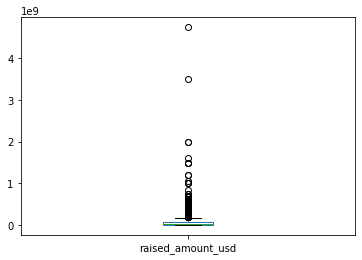

In [26]:
mf_g4[mf_g4["funding_round_type"] == "private_equity"]["raised_amount_usd"].value_counts().sum()
mf_g4[(mf_g4["funding_round_type"] == "private_equity") & (mf_g4["raised_amount_usd"]>0 )]["raised_amount_usd"].value_counts().sum()
mf_g4[mf_g4["funding_round_type"] == "private_equity"]["raised_amount_usd"].plot.box()

Me=mf_g4[(mf_g4["funding_round_type"] == "private_equity") & (mf_g4["raised_amount_usd"]>0 )]

In [27]:
q1=Me["raised_amount_usd"].quantile(0.25)
q2=Me["raised_amount_usd"].quantile(0.75)
IQR= q2-q1
l = q1-1.5*IQR
u = q2+1.5*IQR
print(l,u)

-100000000.0 180000000.0


179

200000000.0    22
250000000.0    18
300000000.0    15
500000000.0     8
400000000.0     5
               ..
422000000.0     1
395000000.0     1
210899993.0     1
833000000.0     1
275000000.0     1
Name: raised_amount_usd, Length: 94, dtype: int64

0

Series([], Name: raised_amount_usd, dtype: int64)

100000000.0    67
10000000.0     42
50000000.0     42
25000000.0     40
5000000.0      39
               ..
14800000.0      1
6023000.0       1
4499250.0       1
1542600.0       1
1660.0          1
Name: raised_amount_usd, Length: 846, dtype: int64

count    1.754000e+03
mean     3.501767e+07
std      4.106894e+07
min      6.000000e+00
25%      4.817264e+06
50%      1.500000e+07
75%      5.500000e+07
max      1.750000e+08
Name: raised_amount_usd, dtype: float64

<AxesSubplot:>

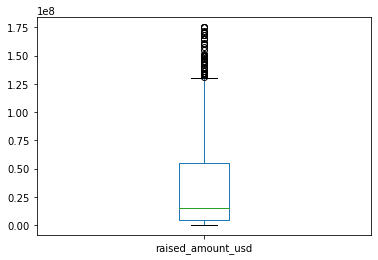

<AxesSubplot:ylabel='Frequency'>

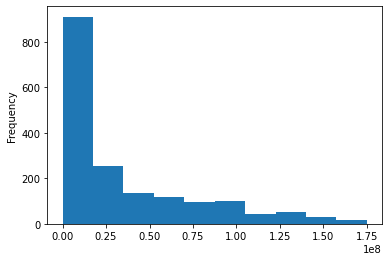

<AxesSubplot:xlabel='raised_amount_usd', ylabel='Density'>

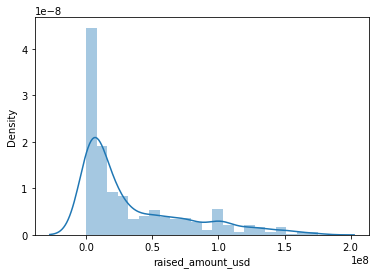

In [28]:
Me[Me["raised_amount_usd"]>=u]["raised_amount_usd"].value_counts().sum()
Me[Me["raised_amount_usd"]>=u]["raised_amount_usd"].value_counts()

Me[(Me["raised_amount_usd"]<=l)]["raised_amount_usd"].value_counts().sum()
Me[(Me["raised_amount_usd"]<=l)]["raised_amount_usd"].value_counts()

Meo=Me[(Me["raised_amount_usd"]>=l) & (Me["raised_amount_usd"]<=u)]
Me[(Me["raised_amount_usd"]>=l) & (Me["raised_amount_usd"]<=u)]["raised_amount_usd"].value_counts()
Me[(Me["raised_amount_usd"]>=l) & (Me["raised_amount_usd"]<=u)]["raised_amount_usd"].describe()


# To visualize the scenario
Me[(Me["raised_amount_usd"]>=l) & (Me["raised_amount_usd"]<=u)]["raised_amount_usd"].plot.box()
plt.show()

Me[(Me["raised_amount_usd"]>=l) & (Me["raised_amount_usd"]<=u)]["raised_amount_usd"].plot.hist()
plt.show()

sns.distplot(Me[(Me["raised_amount_usd"]>=l) & (Me["raised_amount_usd"]<=u)]["raised_amount_usd"])
plt.show()

Considering representative funding amount for "private_equity" as 3.501767e+07 (mean from the above output)

# CHECK-POINT-3

## Country analysis

### 10) Top 9 countries with the highest amount of funding (Before removing outliers)

In [29]:
Mvt9=Mv.groupby(['country_code'])['raised_amount_usd'].sum().sort_values(ascending=False)
Mvt9.head(9)

country_code
USA    4.225108e+11
CHN    3.983542e+10
GBR    2.024563e+10
IND    1.439186e+10
CAN    9.583332e+09
FRA    7.259537e+09
ISR    6.907515e+09
DEU    6.346960e+09
JPN    3.363677e+09
Name: raised_amount_usd, dtype: float64

#### Top 3 English speaking companies are : 
#### 1) USA 
#### 2) GBR 
#### 3) IND

# CHECK-POINT-4

## Sector analysis

In [30]:
# Reading mapping
mapping = pd.read_csv("mapping.csv",encoding = "palmos")

In [31]:
# Getting dataframe by removing null values from 'category_list'
mf_pse = master_frame[~(master_frame["category_list"].isnull())]

# Splitting the 'primary_sector'
mf_pse['primary_sector'] = master_frame["category_list"].str.split('|')

# Getting the first value from split of 'primary_sector'
mf_pse['primary_sector'] = mf_pse['primary_sector'].apply(lambda x : x[0])

mf_pse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111539 entries, 0 to 114948
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                111539 non-null  object 
 1   name                     111538 non-null  object 
 2   homepage_url             106376 non-null  object 
 3   category_list            111539 non-null  object 
 4   status                   111539 non-null  object 
 5   country_code             104532 non-null  object 
 6   state_code               102319 non-null  object 
 7   region                   103077 non-null  object 
 8   city                     103080 non-null  object 
 9   founded_at               92848 non-null   object 
 10  funding_round_permalink  111539 non-null  object 
 11  funding_round_type       111539 non-null  object 
 12  funding_round_code       30654 non-null   object 
 13  funded_at                111539 non-null  object 
 14  rais

In [32]:
# Removing null values from "category_list"
mapping_si = mapping[~(mapping["category_list"].isna())]

# Setting index to 'category_list'
mapping_si.set_index('category_list', inplace = True)

# Taking a constant with '1'
value = 1

# Invoking a list
list_Df = [['primary_sector','main_sector']]

# Getting a boolean dataframe with 'value' as True
res = mapping_si.isin([value])

# Getting a boolean dataframe with 'value' as True while removing rows
ser = res.any()

# Getting list of columns with 'value' as True
col_list = list(ser[ser == True].index)


for col in col_list:
    # Getting list of rows with 'value' as True
    row_list = list(res[res[col] == True].index)       
    for row in row_list:
        list_Df.append([row,col])
             
# Getting a dataframe to map 'primary_sector' to 'main_sector' 
Df = pd.DataFrame(list_Df[1:],columns=list_Df[0])

# Merging the dataframes to map 'primary_sector' to 'main_sector'
mf_pse=pd.merge(mf_pse, Df, sort = False)

mf_pse.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media,Entertainment
1,/ORGANIZATION/90MIN,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,Media,Entertainment
2,/ORGANIZATION/90MIN,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,Media,Entertainment
3,/ORGANIZATION/90MIN,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,Media,Entertainment
4,/ORGANIZATION/A-B-PRODUCTIONS,A.B Productions,NaN,Media|Music|News,operating,USA,CA,Los Angeles,Los Angeles,11-12-2012,/funding-round/23bab180ab73f0dcc3f555bebdf89ade,debt_financing,NaN,21-01-2014,NaN,Media,Entertainment


# CHECK-POINT-5

In [33]:
# Getting Dataframe of Top English-speaking country with Spark Funds investment range
D1 = mf_pse[(mf_pse['country_code']=='USA') & (mf_pse['funding_round_type']=='venture') & (mf_pse['raised_amount_usd']>=5000000) & (mf_pse['raised_amount_usd']<= 15000000)]

# Getting Dataframe of Second English-speaking country with Spark Funds investment range
D2 = mf_pse[(mf_pse['country_code']=='GBR') & (mf_pse['funding_round_type']=='venture') & (mf_pse['raised_amount_usd']>=5000000) & (mf_pse['raised_amount_usd']<= 15000000)]

# Getting Dataframe of Third English-speaking country with Spark Funds investment range
D3 = mf_pse[(mf_pse['country_code']=='IND') & (mf_pse['funding_round_type']=='venture') & (mf_pse['raised_amount_usd']>=5000000) & (mf_pse['raised_amount_usd']<= 15000000)]

In [34]:
# Getting Total number of Investments(count) for Top, Second, Third English-speaking country respectively.
D1.raised_amount_usd.count()
D2.raised_amount_usd.count()
D3.raised_amount_usd.count()

11149

577

299

In [35]:
# Total amount of investment(USD) for Top, Second, Third English-speaking country respectively.
D1.raised_amount_usd.sum()
D2.raised_amount_usd.sum()
D3.raised_amount_usd.sum()

99661524549.0

5028704358.0

2683537552.0

In [36]:
# Getting Top, Second, Third Sector name(no. of investment-wise) for Top English-speaking country
D1.groupby(['main_sector']).count().sort_values('raised_amount_usd',ascending=False)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector
main_sector,,,,,,,,,,,,,,,,
Others,2923,2923,2721,2923,2923,2923,2922,2922,2922,2558,2923,2923,2144,2923,2923,2923
Cleantech / Semiconductors,2297,2297,2172,2297,2297,2297,2297,2295,2295,1811,2297,2297,1377,2297,2297,2297
"Social, Finance, Analytics, Advertising",1912,1912,1865,1912,1912,1912,1912,1909,1909,1756,1912,1912,1513,1912,1912,1912
"News, Search and Messaging",1563,1563,1517,1563,1563,1563,1562,1561,1561,1404,1563,1563,1229,1563,1563,1563
Health,908,908,854,908,908,908,908,908,908,705,908,908,532,908,908,908
Manufacturing,799,799,755,799,799,799,799,798,798,661,799,799,528,799,799,799
Entertainment,580,580,565,580,580,580,580,580,580,524,580,580,465,580,580,580
Automotive & Sports,167,167,156,167,167,167,167,167,167,142,167,167,105,167,167,167


In [37]:
# Getting Top, Second, Third Sector name(no. of investment-wise) for Second English-speaking country
D2.groupby(['main_sector']).count().sort_values('raised_amount_usd',ascending=False)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector
main_sector,,,,,,,,,,,,,,,,
Others,143,143,130,143,143,143,142,141,141,120,143,143,78,143,143,143
Cleantech / Semiconductors,127,127,123,127,127,127,120,117,117,84,127,127,81,127,127,127
"Social, Finance, Analytics, Advertising",98,98,96,98,98,98,97,95,95,88,98,98,74,98,98,98
"News, Search and Messaging",73,73,71,73,73,73,72,70,70,64,73,73,43,73,73,73
Entertainment,54,54,52,54,54,54,54,53,53,47,54,54,38,54,54,54
Manufacturing,42,42,38,42,42,42,40,38,38,28,42,42,18,42,42,42
Health,24,24,24,24,24,24,23,20,20,14,24,24,10,24,24,24
Automotive & Sports,16,16,16,16,16,16,15,14,14,14,16,16,13,16,16,16


In [38]:
# Getting Top, Second, Third Sector name(no. of investment-wise) for Third English-speaking country
D3.groupby(['main_sector']).count().sort_values('raised_amount_usd',ascending=False)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector
main_sector,,,,,,,,,,,,,,,,
Others,109,109,109,109,109,109,109,109,109,99,109,109,80,109,109,109
"News, Search and Messaging",52,52,50,52,52,52,52,52,52,46,52,52,41,52,52,52
Entertainment,33,33,33,33,33,33,33,33,33,26,33,33,24,33,33,33
"Social, Finance, Analytics, Advertising",32,32,32,32,32,32,32,32,32,27,32,32,25,32,32,32
Manufacturing,21,21,21,21,21,21,21,21,21,17,21,21,8,21,21,21
Cleantech / Semiconductors,20,20,20,20,20,20,20,20,20,17,20,20,11,20,20,20
Health,19,19,19,19,19,19,19,19,19,12,19,19,11,19,19,19
Automotive & Sports,13,13,13,13,13,13,12,12,12,13,13,13,11,13,13,13


In [39]:
# Getting company which received the highest investment in Top Sector for Top, Second, Third English-speaking country respectively.

D1[(D1['main_sector']=='Others')].groupby(['permalink'])['raised_amount_usd'].sum().sort_values(ascending=False)

D2[(D2['main_sector']=='Others')].groupby(['permalink'])['raised_amount_usd'].sum().sort_values(ascending=False)

D3[(D3['main_sector']=='Others')].groupby(['permalink'])['raised_amount_usd'].sum().sort_values(ascending=False)

permalink
/ORGANIZATION/VIRTUSTREAM              64300000.0
/ORGANIZATION/CAPELLA                  54968051.0
/ORGANIZATION/AIRTIGHT-NETWORKS        54201907.0
/ORGANIZATION/DECARTA                  52100000.0
/ORGANIZATION/BLACK-DUCK-SOFTWARE      51000000.0
                                          ...    
/ORGANIZATION/SANPULSE-TECHNOLOGIES     5000000.0
/ORGANIZATION/IRIDIAN-TECHNOLOGIES      5000000.0
/ORGANIZATION/VICTRIO                   5000000.0
/ORGANIZATION/PET-S-CHOICE              5000000.0
/ORGANIZATION/URBAN-REMEDY              5000000.0
Name: raised_amount_usd, Length: 2030, dtype: float64

permalink
/ORGANIZATION/ELECTRIC-CLOUD             37000000.0
/ORGANIZATION/SENSAGE                    36250000.0
/ORGANIZATION/ENIGMATIC                  32500000.0
/ORGANIZATION/SILVERRAIL-TECHNOLOGIES    29000000.0
/ORGANIZATION/OPENCLOUD                  27972766.0
                                            ...    
/ORGANIZATION/VECTOR-WATCH                5000000.0
/ORGANIZATION/PHOTOBOX                    5000000.0
/ORGANIZATION/UDEX                        5000000.0
/ORGANIZATION/BACULA-SYSTEMS              5000000.0
/ORGANIZATION/BULLGUARD                   5000000.0
Name: raised_amount_usd, Length: 117, dtype: float64

permalink
/ORGANIZATION/FIRSTCRY-COM           39000000.0
/ORGANIZATION/MYNTRA                 38000000.0
/ORGANIZATION/COMMONFLOOR            32900000.0
/ORGANIZATION/PEPPERFRY-COM          28000000.0
/ORGANIZATION/ITZCASH-CARD-LTD       25000000.0
                                        ...    
/ORGANIZATION/TASTYKHANA              5000000.0
/ORGANIZATION/REZNEXT                 5000000.0
/ORGANIZATION/VOONIK-COM              5000000.0
/ORGANIZATION/VEDANTU-INNOVATIONS     5000000.0
/ORGANIZATION/LIASES-FORAS            5000000.0
Name: raised_amount_usd, Length: 87, dtype: float64

In [40]:
# Getting company which received the highest investment in Second Sector for Top, Second, Third English-speaking country respectively.

D1[(D1['main_sector']=='Cleantech / Semiconductors')].groupby(['permalink'])['raised_amount_usd'].sum().sort_values(ascending=False)

D2[(D2['main_sector']=='Cleantech / Semiconductors')].groupby(['permalink'])['raised_amount_usd'].sum().sort_values(ascending=False)

D3[(D3['main_sector']=='News, Search and Messaging')].groupby(['permalink'])['raised_amount_usd'].sum().sort_values(ascending=False)

permalink
/ORGANIZATION/BIODESIX               75300000.0
/ORGANIZATION/TIGO-ENERGY            68739496.0
/ORGANIZATION/FORSIGHT-LABS          61300001.0
/ORGANIZATION/RHEONIX                56124758.0
/ORGANIZATION/SCIENERGY              55375423.0
                                        ...    
/ORGANIZATION/AZURAY-TECHNOLOGIES     5000000.0
/ORGANIZATION/GT-UROLOGICAL           5000000.0
/ORGANIZATION/BENCHLING               5000000.0
/ORGANIZATION/HADRON-SYSTEMS          5000000.0
/ORGANIZATION/1BOG                    5000000.0
Name: raised_amount_usd, Length: 1582, dtype: float64

permalink
/ORGANIZATION/EUSA-PHARMA                                                      35600000.0
/ORGANIZATION/HORIZON-DISCOVERY                                                31353719.0
/ORGANIZATION/F-STAR-BIOTECHNOLOGISCHE-FORSCHUNGS-UND-ENTWICKLUNGSGES-M-B-H    29132906.0
/ORGANIZATION/ELIXENT                                                          25000000.0
/ORGANIZATION/TAKEDA-CAMBRIDGE                                                 22340000.0
                                                                                  ...    
/ORGANIZATION/LAMELLAR-BIOMEDICAL                                               5301059.0
/ORGANIZATION/MMIC-SOLUTIONS                                                    5250000.0
/ORGANIZATION/FLOWLINE                                                          5104587.0
/ORGANIZATION/IGNIS-ENERGY                                                      5014644.0
/ORGANIZATION/EXCO-INTOUCH                                                      5000000.0


permalink
/ORGANIZATION/GUPSHUP-TECHNOLOGY-INDIA-PVT-LTD    33000000.0
/ORGANIZATION/IMIMOBILE                           23000000.0
/ORGANIZATION/SMS-GUPSHUP                         22000000.0
/ORGANIZATION/HIKE                                21000000.0
/ORGANIZATION/ROADRUNNR                           21000000.0
/ORGANIZATION/MATRIMONY-COM                       20400000.0
/ORGANIZATION/GURUJI                              15000000.0
/ORGANIZATION/BLUESTONE-COM                       15000000.0
/ORGANIZATION/MOBILE2WIN-INDIA                    15000000.0
/ORGANIZATION/QUIKR-INDIA                         14000000.0
/ORGANIZATION/BHARAT-MATRIMONY                    11750000.0
/ORGANIZATION/TELEDNA                             10490000.0
/ORGANIZATION/BABAJOB                             10000000.0
/ORGANIZATION/MONEY-ON-MOBILE                     10000000.0
/ORGANIZATION/FOURINTERACTIVE                     10000000.0
/ORGANIZATION/JUST-DIAL                           10000000.0
/ORGANIZATION/

# CHECK-POINT-6

#### 6.1) A plot showing the representative amount of investment in each funding type

<Figure size 1800x720 with 0 Axes>

<AxesSubplot:xlabel='funding_round_type', ylabel='representative_value'>

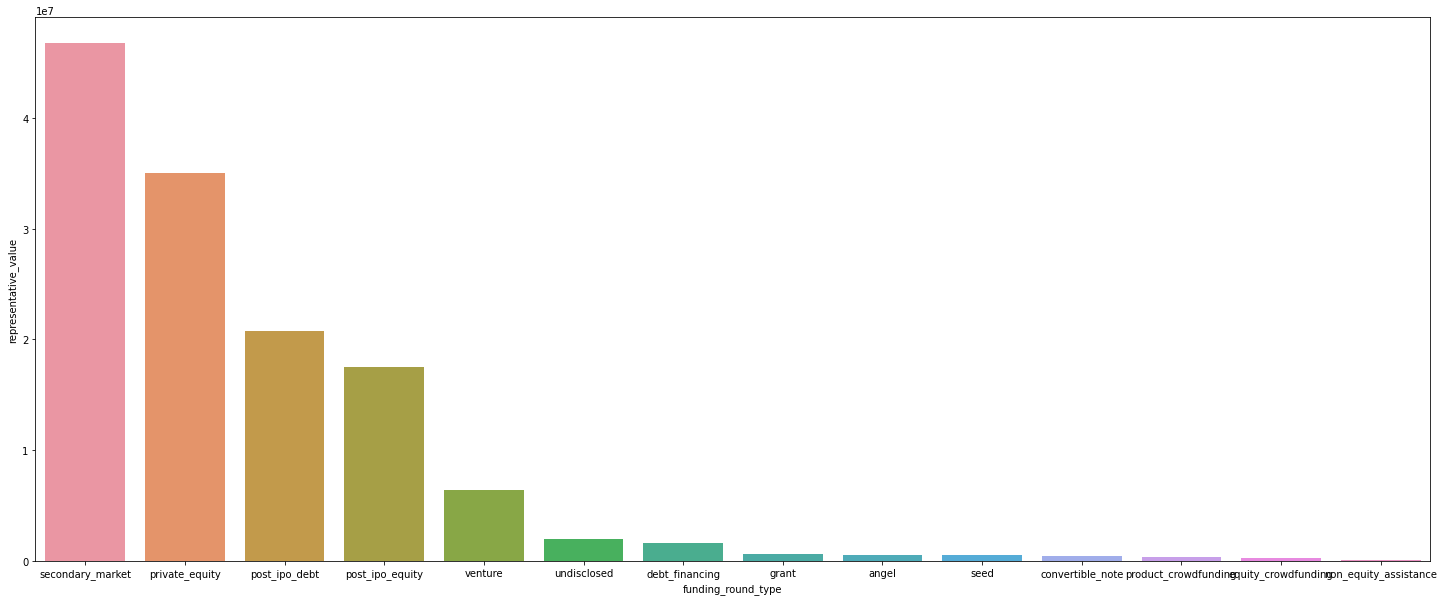

In [41]:
# Invoking a list to get a dataframe of reprentative values
l_rv = [['representative_value','funding_round_type']]

# Removing null values of 'raised_amount_usd' and 'funding_round_type' from "master_frame_d"
master_frame_d = master_frame[~((master_frame["raised_amount_usd"].isna()) & (master_frame["funding_round_type"].isna()))]

# Getting the list of 'funding_round_type' values without duplication
list_frtype = master_frame_d['funding_round_type'].drop_duplicates().to_list()


for ftype in list_frtype:

    # Filtering the dataframe with 'funding_round_type' and 'raised_amount_usd' greater than 0
    master_frame_d2=master_frame_d[(master_frame_d['funding_round_type'] == ftype) & (master_frame_d["raised_amount_usd"]>0 )]
   
    # Getting upper and lower extreme values
    q1=master_frame_d2["raised_amount_usd"].quantile(0.25)
    q2=master_frame_d2["raised_amount_usd"].quantile(0.75)
    IQR= q2-q1
    l = q1-1.5*IQR
    u = q2+1.5*IQR
    
    #Removing outliers from dataframe and getting the mean from each 'funding_round_type'
    mn=master_frame_d2[(master_frame_d2["raised_amount_usd"]>=l) & (master_frame_d2["raised_amount_usd"]<=u)]["raised_amount_usd"].mean()
    
    # Adding the 'funding_round_type' and respective mean values as list to l_rv
    l_rv.append([mn,ftype])

# Creating a data frame from a list(l_rv)
Df_rv = pd.DataFrame(l_rv[1:],columns=l_rv[0])

# Plotting a bar graph
plt.figure(figsize=[25,10])
sns.barplot(data=Df_rv, x='funding_round_type', y='representative_value', order=Df_rv.sort_values('representative_value',ascending = False).funding_round_type)
plt.show()



##### Plotting only four funding types

<Figure size 1800x720 with 0 Axes>

<AxesSubplot:xlabel='funding_round_type', ylabel='representative_value'>

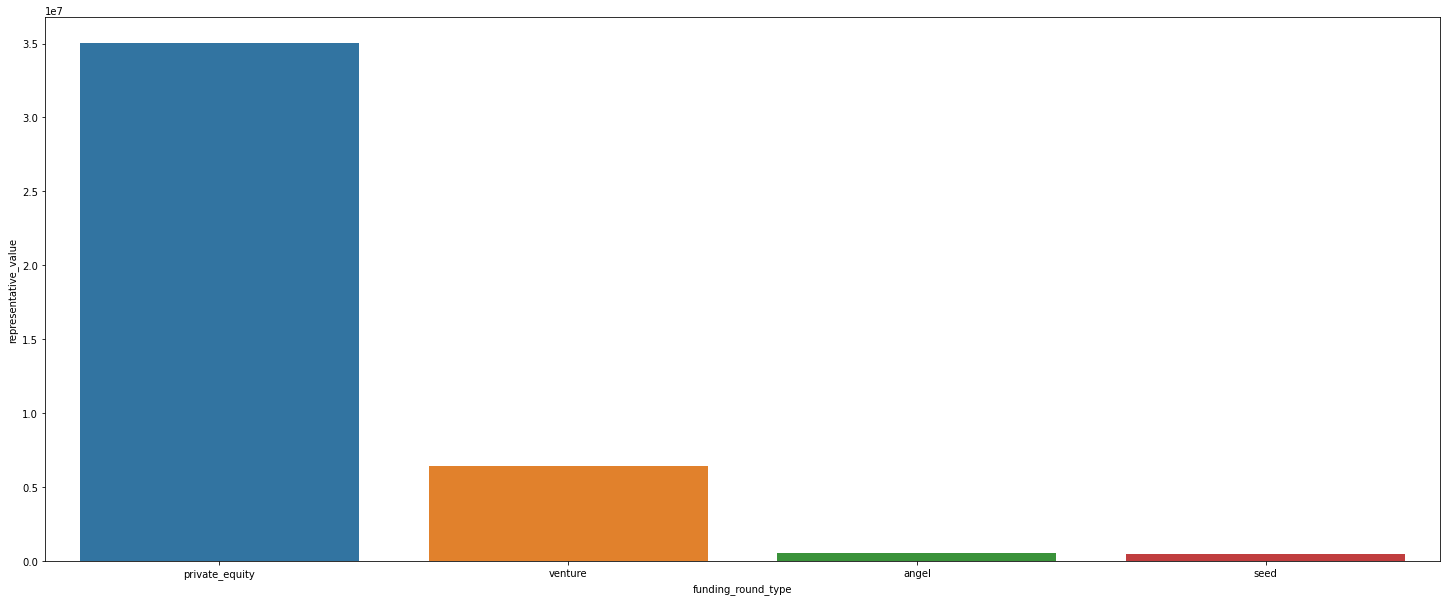

In [42]:
k1=Mvo["raised_amount_usd"].mean()
k2=Mao["raised_amount_usd"].mean()
k3=Mso["raised_amount_usd"].mean()
k4=Meo["raised_amount_usd"].mean()

l_rv2 = [['representative_value','funding_round_type'],[k1,'venture'],[k2,'angel'],[k3,'seed'],[k4,'private_equity']]
Df_rv2 = pd.DataFrame(l_rv2[1:],columns=l_rv2[0])

# Plotting a bar graph
plt.figure(figsize=[25,10])
sns.barplot(data=Df_rv2, x='funding_round_type', y='representative_value', order=Df_rv2.sort_values('representative_value',ascending = False).funding_round_type)
plt.show()

#### 6.2) A plot showing the top 9 countries against the total amount of investments of funding type FT(venture type)

<Figure size 1296x720 with 0 Axes>

<AxesSubplot:xlabel='raised_amount_usd', ylabel='country_code'>

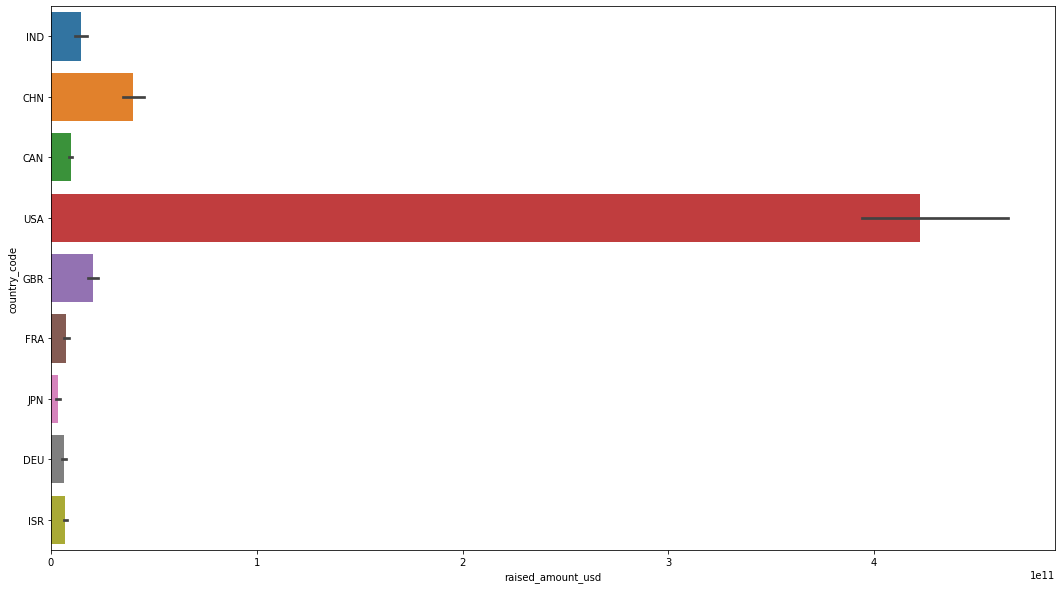

In [43]:
# Getting a dataframe with 'funding_round_type' as 'venture' and 'country_code' for top 9 countries(based on the total investment amount each country has received)
Mvt9d=Mv[Mv['country_code'].isin(['USA','CHN','GBR','IND','CAN','FRA','ISR','DEU','JPN'])]

# Plotting a bar graph
plt.figure(figsize=[18,10])
sns.barplot(data=Mvt9d, y='country_code',x='raised_amount_usd', estimator=sum , orient = 'h' )
plt.show()

#### 6.3) A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT(venture type))

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='country_code', ylabel='count'>

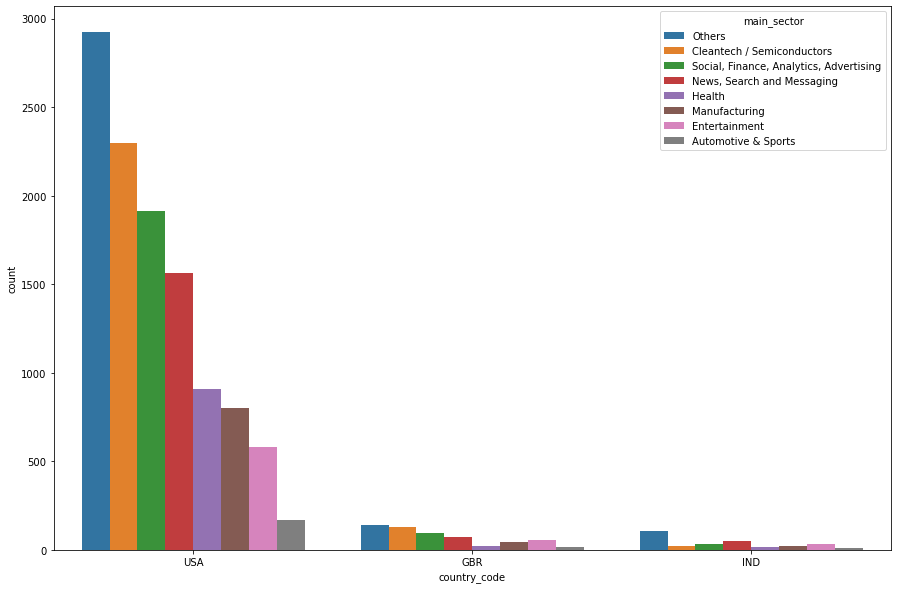

In [44]:
# Recap of operations done on dataframes which are used in this cell
#---------------------------------------------------------------------------------------------------------------------
# mf_g4 = master_frame[master_frame["funding_round_type"].isin(["angel","venture","seed","private_equity"])]
# mf_g4 = mf_g4[~(mf_g4["raised_amount_usd"].isna())]
# Mv=mf_g4[(mf_g4["funding_round_type"] == "venture") & (mf_g4["raised_amount_usd"]>0 )]

# mf_pse = master_frame[~(master_frame["category_list"].isnull())]
# mf_pse=pd.merge(mf_pse, Df, sort = False)
#----------------------------------------------------------------------------------------------------------------------

# Getting a dataframe by removing null values from 'raised_amount_usd'
mf_pse_d = mf_pse[~(mf_pse["raised_amount_usd"].isna())]

# Filtering dataframe with below
mf_pse_d2 = mf_pse_d[(mf_pse_d["funding_round_type"] == "venture") & (mf_pse['raised_amount_usd']>=5000000) & (mf_pse['raised_amount_usd']<= 15000000) & mf_pse_d['country_code'].isin(['USA','GBR','IND'])]

# Plotting a count graph
plt.figure(figsize=[15,10])
sns.countplot(x="country_code", hue="main_sector", data=mf_pse_d2, order = mf_pse_d2['country_code'].value_counts().index, hue_order=mf_pse_d2['main_sector'].value_counts().index)
plt.show()


##### Plotting only  top 3 sectors

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='country_code', ylabel='count'>

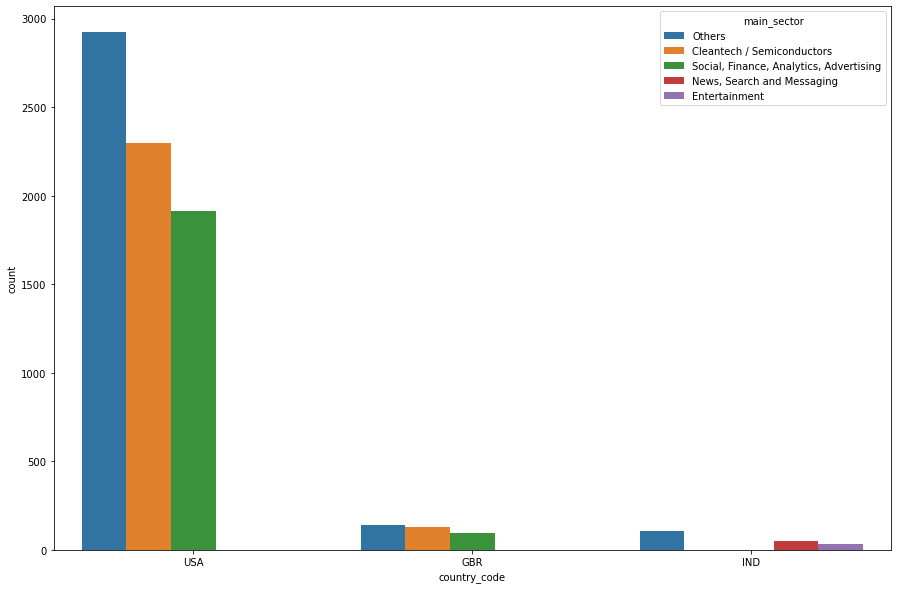

In [45]:
dft1=mf_pse_d2[(mf_pse_d2["country_code"] == "USA") & (mf_pse_d2['main_sector'].isin(['Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising']))]
dft2=mf_pse_d2[(mf_pse_d2["country_code"] == "GBR") & (mf_pse_d2['main_sector'].isin(['Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising']))]
dft3=mf_pse_d2[(mf_pse_d2["country_code"] == "IND") & (mf_pse_d2['main_sector'].isin(['Others','News, Search and Messaging','Entertainment']))]

frms = [dft1, dft2,dft3]

dft123 = pd.concat(frms, sort=False)

# Plotting a count graph
plt.figure(figsize=[15,10])
sns.countplot(x="country_code", hue="main_sector", data=dft123, order = dft123['country_code'].value_counts().index, hue_order=dft123['main_sector'].value_counts().index)
plt.show()